<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/Customers_clustering_K_Means%2C_DBSCAN_and_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Reading data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.23.5
seaborn version: 0.12.2


In [4]:
mall_data = pd.read_csv("Mall_Customers.csv")
print("There are {} rows and {} columns in our dataset.".format(mall_data.shape[0],
                                                                mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [5]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
66,67,Female,43,48,50
7,8,Female,23,18,94
120,121,Male,27,67,56
126,127,Male,43,71,35
136,137,Female,44,73,7
187,188,Male,28,101,68
95,96,Male,24,60,52
115,116,Female,19,65,50
17,18,Male,20,21,66
71,72,Female,47,49,42


In [6]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* 결측치는 없음.

# Exploratory Data Analysis

## 3.1 Distributions

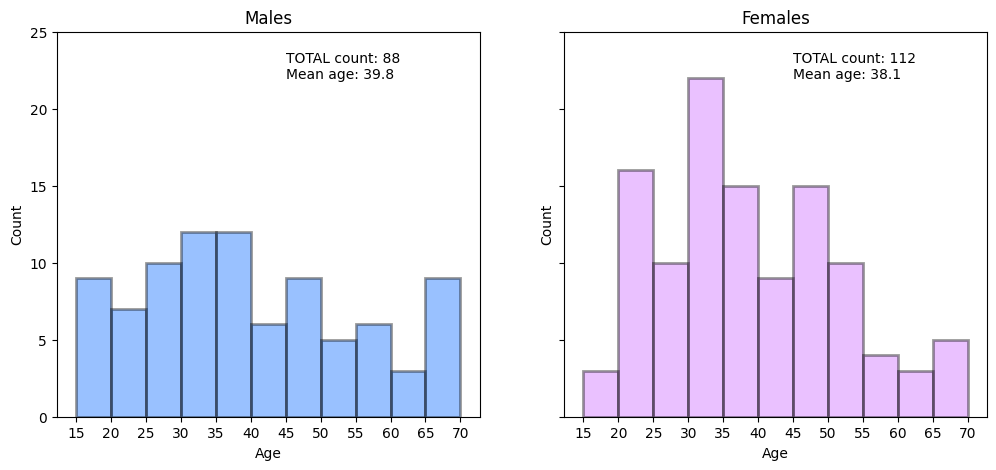

In [9]:
males_age = mall_data[mall_data["Gender"] == "Male"]["Age"]   # subset with males ages
females_age = mall_data[mall_data["Gender"] == "Female"]["Age"]    # subset with females age

age_bins = range(15, 75, 5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.distplot(males_age, bins = age_bins, kde = False, color = "#0066FF", ax = ax1,
             hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top = 25)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins = age_bins, kde = False, color = "#CC66FF", ax = ax2,
             hist_kws = dict(edgecolor = "k", linewidth = 2))
ax2.set_xticks(age_bins)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45, 23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [10]:
print("Kolgomorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


* 남성 고객의 평균 연령이 여성 고객보다 약간 높음.
* 남성의 연령 분포는 여성보다 균일하며, 여성에서 가장 큰 연령 그룹은 30~35세.
* Kolgomorov-Smirnov 검정 결과 두 그룹 간의 차이가 통게적으로 유의하지 않음.

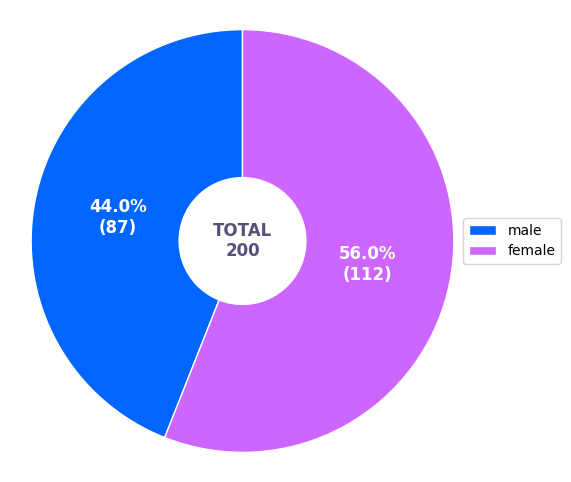

In [11]:
def labelr(pct, allvals):
  absolute = int(pct / 100.*np.sum(allvals))
  return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(), females_age.count()]    # wedge sizes

fig0, ax1 = plt.subplots(figsize = (6, 6))
wedges, texts, autotexts = ax1.pie(sizes, autopct = lambda pct: labelr(pct, sizes),
                                   radius = 1, colors = ["#0066FF", "#CC66FF"], startangle = 90,
                                   textprops = dict(color = "w"),
                                   wedgeprops = dict(width = 0.7, edgecolor = "w"))

ax1.legend(wedges, ["male", "female"], loc = "center right", bbox_to_anchor = (0.7, 0, 0.5, 1))

plt.text(0, 0, "TOTAL\n{}".format(mall_data["Age"].count()), weight = "bold", size = 12,
         color = "#52527A", ha = "center", va = "center")

plt.setp(autotexts, size = 12, weight = "bold")
ax1.axis("equal")    # Equal aspect ratio
plt.show()

* 여성 고객이 남성 고객보다 약간 더 많음

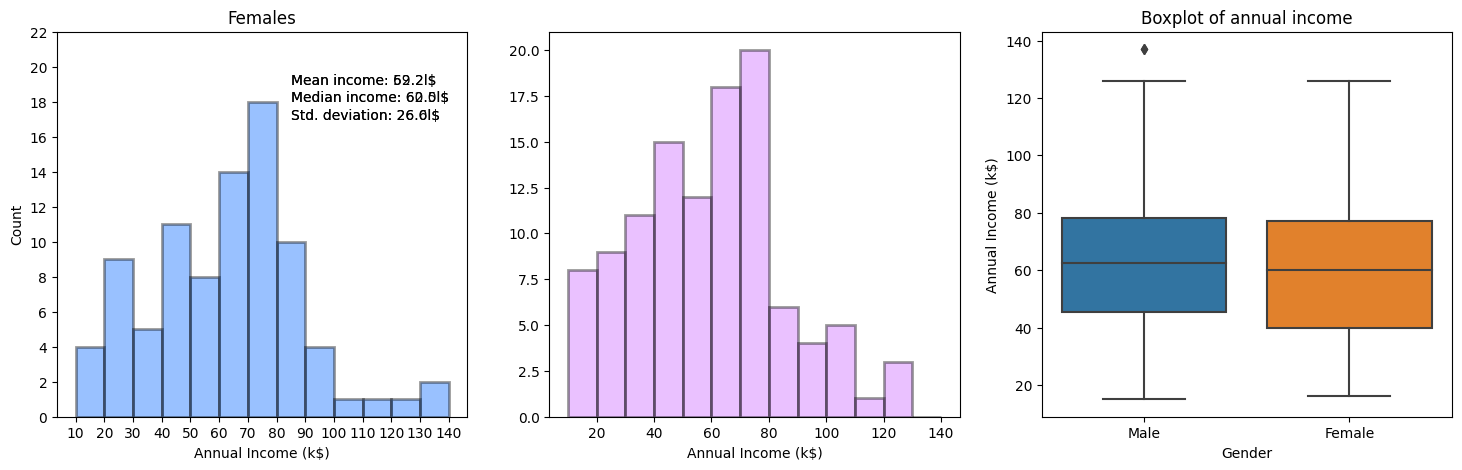

In [12]:
males_income = mall_data[mall_data["Gender"] == "Male"]["Annual Income (k$)"]    # subset with males income
females_income = mall_data[mall_data["Gender"] == "Female"]["Annual Income (k$)"]    # subset with females income

my_bins = range(10, 150, 10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))
sns.distplot(males_income, bins = my_bins, kde = False, color = "#0066FF", ax = ax1,
             hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0, 24, 2))
ax1.set_ylim(0, 22)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(85, 19, "Mean income: {:.1f}l$".format(males_income.mean()))
ax1.text(85, 18, "Median income: {:.1f}l$".format(males_income.median()))
ax1.text(85, 17, "Std. deviation: {:.1f}l$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins = my_bins, kde = False, color = "#CC66FF", ax = ax2,
             hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0, 24, 2))
ax1.set_ylim(0, 22)
ax1.set_title("Females")
ax1.set_ylabel("Count")
ax1.text(85, 19, "Mean income: {:.1f}l$".format(females_income.mean()))
ax1.text(85, 18, "Median income: {:.1f}l$".format(females_income.median()))
ax1.text(85, 17, "Std. deviation: {:.1f}l$".format(females_income.std()))

# boxplot
sns.boxplot(x = "Gender", y = "Annual Income (k$)", data = mall_data, ax = ax3)
ax3.set_title("Boxplot of annual income")
plt.show()

In [13]:
print("Kolgomorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


* 남성의 평균 소득이 여성보다 높음. 중앙값 소득 또한 남성이 여성보다 높음.
* 두 그룹의 표준편차는 비슷.
* 남성 그룹에서는 연간 소득이 약 140s$인 이상치가 하나 있음.
* K-S 검정을 통해 두 그룹이 통계적으로 다르지 않다는 것을 보여줌.

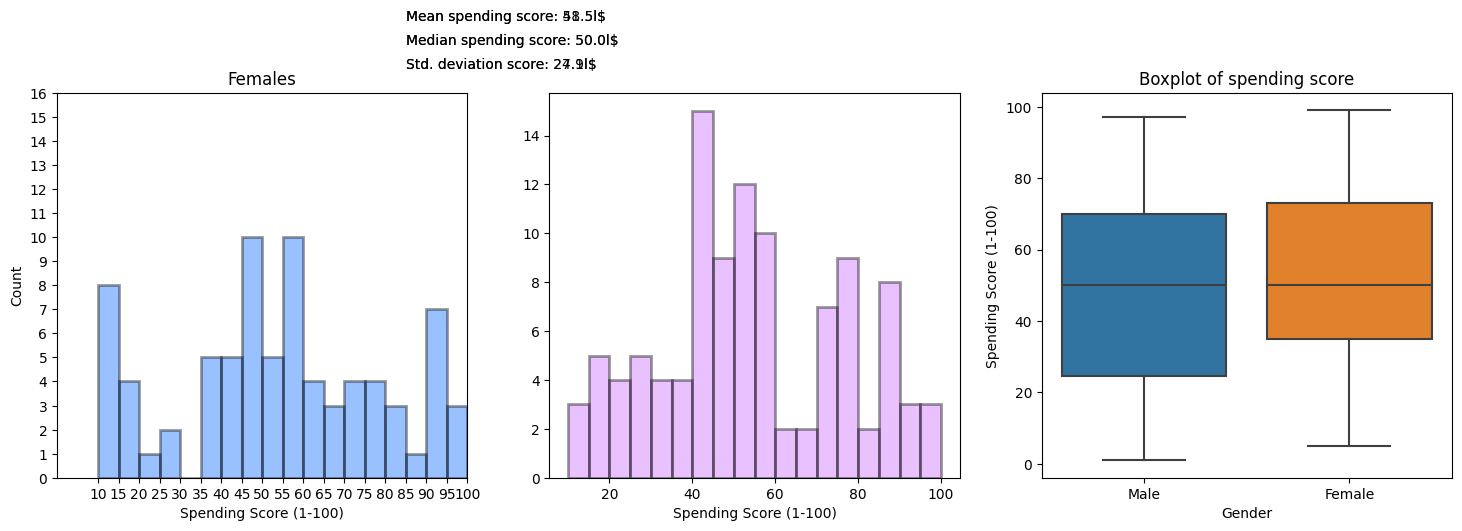

In [14]:
males_spending = mall_data[mall_data["Gender"] == "Male"]["Spending Score (1-100)"]    # subset with males age
females_spending = mall_data[mall_data["Gender"] == "Female"]["Spending Score (1-100)"]    # subset with females age

spending_bins = range(10, 105, 5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))
sns.distplot(males_spending, bins = spending_bins, kde = False, color = "#0066FF", ax = ax1,
             hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0, 100)
ax1.set_yticks(range(0, 17, 1))
ax1.set_ylim(0, 16)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(85, 19, "Mean spending score: {:.1f}l$".format(males_spending.mean()))
ax1.text(85, 18, "Median spending score: {:.1f}l$".format(males_spending.median()))
ax1.text(85, 17, "Std. deviation score: {:.1f}l$".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins = spending_bins, kde = False, color = "#CC66FF", ax = ax2,
             hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0, 100)
ax1.set_yticks(range(0, 17, 1))
ax1.set_ylim(0, 16)
ax1.set_title("Females")
ax1.set_ylabel("Count")
ax1.text(85, 19, "Mean spending score: {:.1f}l$".format(females_spending.mean()))
ax1.text(85, 18, "Median spending score: {:.1f}l$".format(females_spending.median()))
ax1.text(85, 17, "Std. deviation score: {:.1f}l$".format(females_spending.std()))

# boxplot
sns.boxplot(x = "Gender", y = "Spending Score (1-100)", data = mall_data, ax = ax3)
ax3.set_title("Boxplot of spending score")
plt.show()

In [15]:
print("Kolgomorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


* 여성의 평균 소비 점수는 남성보다 높음.
* K-S 검정의 p-값은 귀무 가설을 기각할 증거가 없음.

In [16]:
medians_by_age_group = mall_data.groupby(["Gender", pd.cut(mall_data["Age"], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(["Gender", "Age_group"])
medians_by_age_group.reset_index(inplace = True)

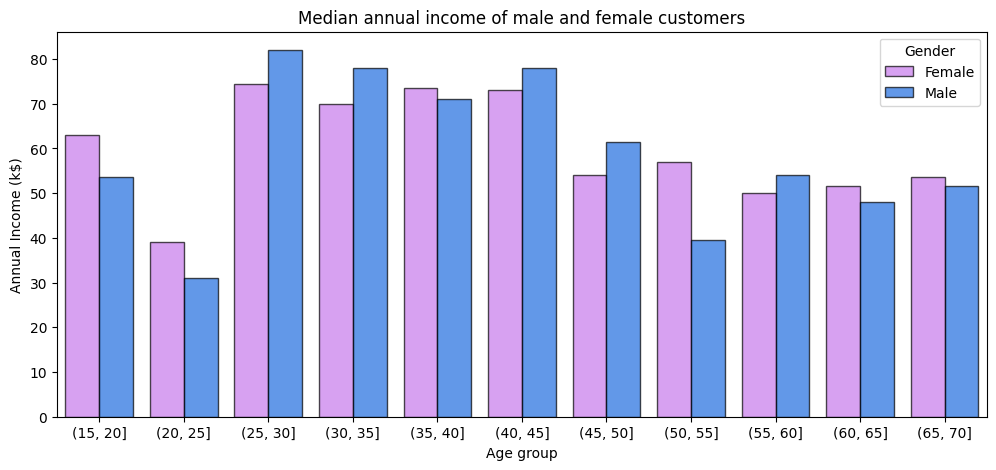

In [17]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.barplot(x = "Age_group", y = "Annual Income (k$)", hue = "Gender", data = medians_by_age_group,
            palette = ["#CC66FF", "#0066FF"], alpha = 0.7, edgecolor = "k", ax = ax)
ax.set_title("Median annual income of male and female customers")
ax.set_xlabel("Age group")
plt.show()

* 가장 부유한 고객들이 25 ~ 45세 사이임을 보여줌.
* 여성과 남성 간의 가장 큰 차이는 25 ~ 30세 연령 그룹과 50 ~ 55세 연령 그룹.

## 3.2 Correlations

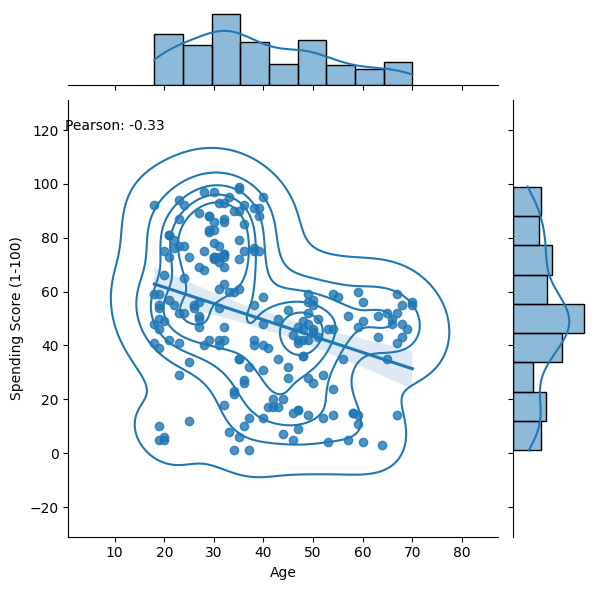

In [18]:
from scipy.stats import pearsonr

# calculation Pearson's correlation
corr, _ = pearsonr(mall_data["Age"], mall_data["Spending Score (1-100)"])

jp = (sns.jointplot(x = "Age", y = "Spending Score (1-100)", data = mall_data, kind = "reg")).plot_joint(sns.kdeplot, zorder = 0, n_levels = 6)

plt.text(0, 120, "Pearson: {:.2f}".format(corr))
plt.show()

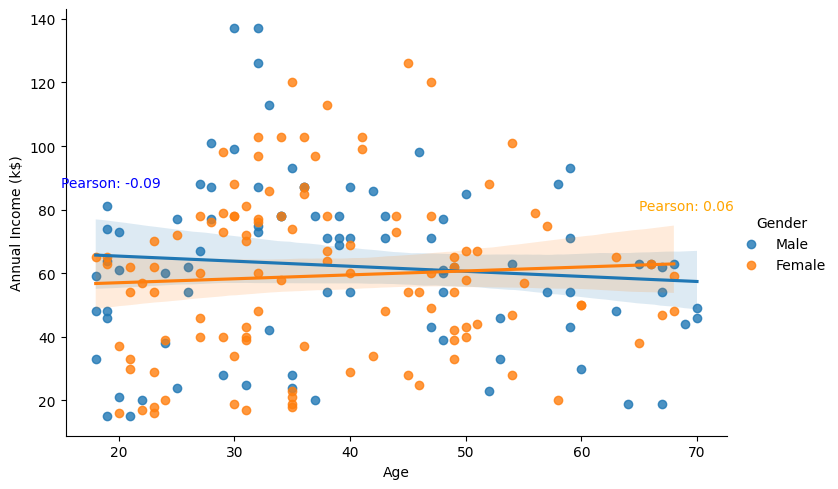

In [19]:
# calculation Pearsons's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x = "Age", y = "Annual Income (k$)", data = mall_data, hue = "Gender",
           aspect = 1.5)

plt.text(15, 87, "Pearson: {:.2f}".format(corr1), color = "blue")
plt.text(65, 80, "Pearson: {:.2f}".format(corr2), color = "orange")

plt.show()

* 고객들의 연려오가 연간 소득 사이에는 양쪽 성별 그룹 모두 큰 상관관계는 없음.

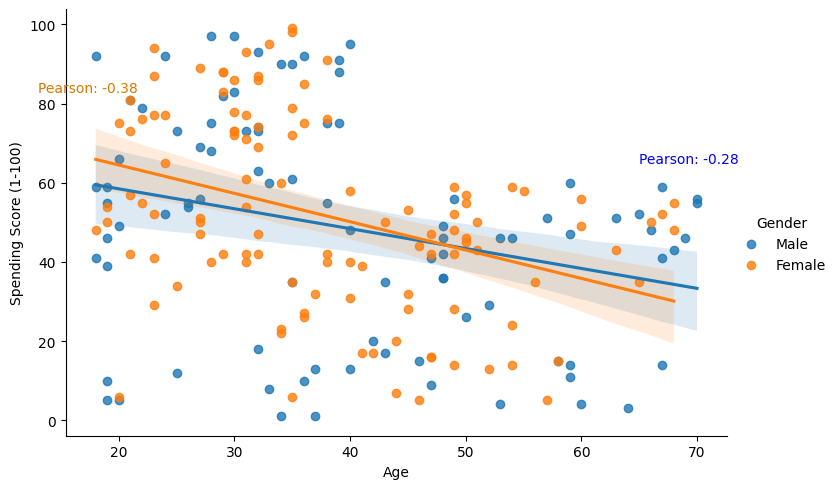

In [20]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = mall_data, hue = "Gender",
           aspect = 1.5)

plt.text(65, 65, "Pearson: {:.2f}".format(corr1), color = "blue")
plt.text(13, 83, "Pearson: {:.2f}".format(corr2), color = "#D97900")

plt.show()

* 양쪽 성별 그룹 모두에서 연령과 소비 점수 사이에 약한 음의 상관관계가 있음.

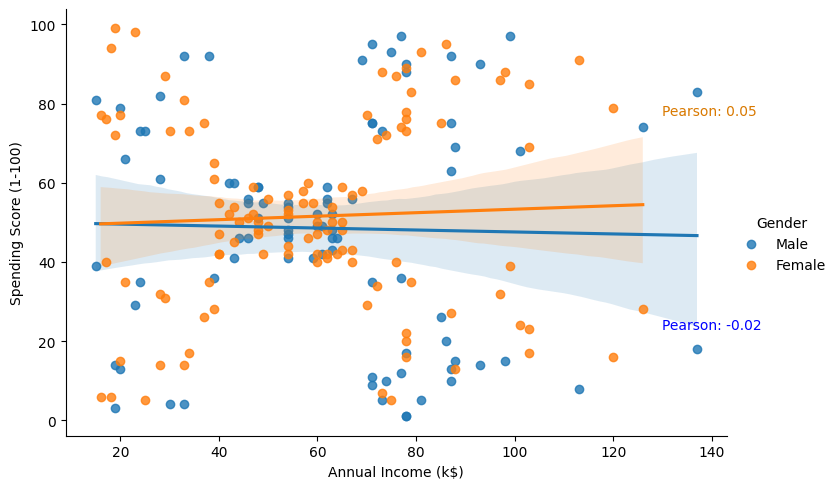

In [21]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = mall_data, hue = "Gender",
           aspect = 1.5)

plt.text(130, 23, "Pearson: {:.2f}".format(corr1), color = "blue")
plt.text(130, 77, "Pearson: {:.2f}".format(corr2), color = "#D97900")

plt.show()

* 고객들의 연간 소득과 소비 점수 사이에는 양쪽 성별 그룹 모두에서 상관관계가 거의 없음.

# 4. Clustering
 * K-Means
 * Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
 * Affinity Propagation

## 4.1 K-Means


### 4.1.1 Description
* 3가지 단계
 * 시드 포인트를 사용하여 샘플을 초기 그룹으로 분할한 후, 시드 포인트에서 가장 가까운 샘플은 초기 군집을 생성함.
 * 샘플의 거리를 그룹의 중심점까지 계산하고, 가장 가까운 샘플을 해당 군집에 할당함.
 * 새롭게 생성된 군집의 중심점을 계산. 알고리즘이 수렴할 때까지 반복함.

* function: $\sum_{i=0}^n  \min_{\mu_{j} \epsilon  C}( \parallel x_i =  \mu _j \parallel^2 )$

* Main parameters
 * Initialisaion criteria: 초기 중심점들이 일반적으로 서로 멀리 떨어져 있게 생성함으로써 더 나은 결과를 얻을 확률을 증가시킴.
 * Number of Clusters: elbow method와 silhouette score 사용
 * A distance metric: 유클리디안 거리.

### 4.1.2 Use case - customers segmentatio

In [22]:
from sklearn.cluster import KMeans

In [23]:
X_numerics = mall_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

* 적절한 군집의 개수를 찾기 위해 elbow method사용.

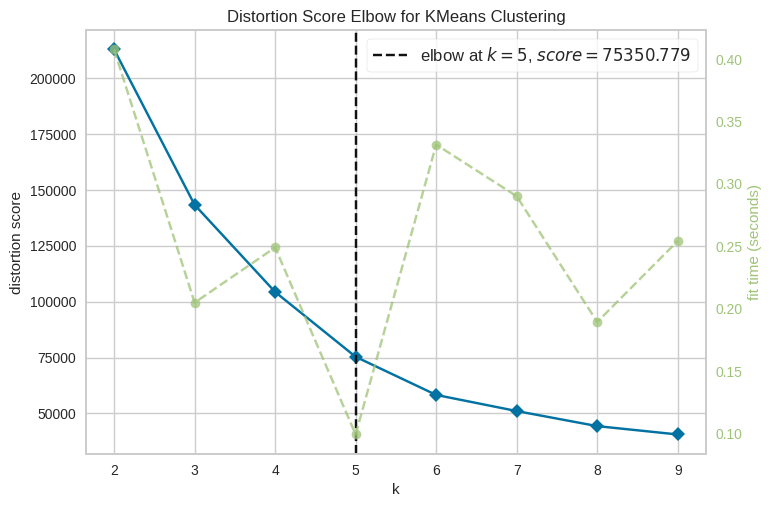

In [24]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k = (2, 10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

* 5개의 군집을 제안

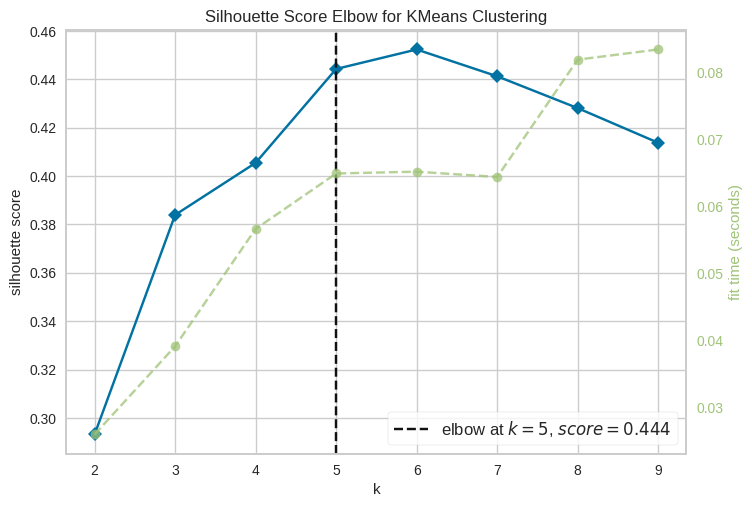

In [25]:
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k = (2, 10), metric = "silhouette")

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

* Silhouette score method는 5개 또는 6개의 군집을 추천.

**5 CLUSTERS**

In [26]:
KM_5_clusters = KMeans(n_clusters = 5, init = "k-means++").fit(X_numerics)

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:, "Cluster"] = KM_5_clusters.labels_    # append labels to points

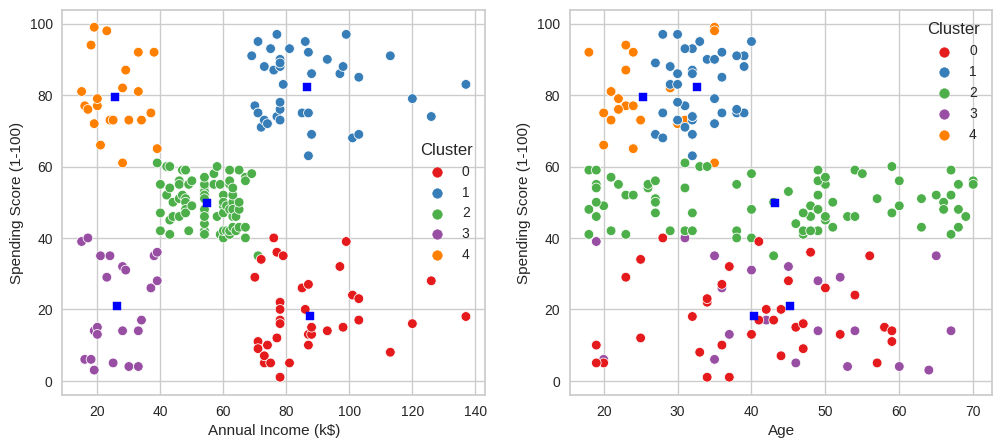

In [27]:
fig1, (axes) = plt.subplots(1, 2, figsize = (12, 5))

scat_1 = sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)",
                         data = KM5_clustered, hue = "Cluster", ax = axes[0], palette = "Set1", legend = "full")

sns.scatterplot(x = "Age", y = "Spending Score (1-100)", data = KM5_clustered, hue = "Cluster",
                palette = "Set1", ax = axes[1], legend = "full")

axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2],
                marker = "s", s = 40, c = "blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2],
                marker = "s", s = 40, c = "blue")
plt.show()

* 5개의 군집
 * 1. 연간 소득이 낮고 소비 점수가 높은 고객
 * 2. 연간 소득이 중간이고 소비 점수가 중간인 고객
 * 3. 연간 소득이 높고 소비 점수가 낮은 고객
 * 4. 연간 소득이 높고 소비 점수가 높은 고객
 * 5. 연간 소득이 낮고 소비 점수가 낮은 고객

* 연령 측면에서 구별되는 그룹은 없음.

In [28]:
KM_clust_sizes = KM5_clustered.groupby("Cluster").size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,37
1,39
2,79
3,23
4,22


* 가장 큰 군집은 79개의 관측값을 가짐.
* 두 개의 작은 군집이 각각 23개의 관측값을 가짐.

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7, 7))
ax = Axes3D(fig, rect = [0, 0, .99, 1], elev = 20, azim = 210)
ax.scatter(KM5_clustered["Age"], KM5_clustered["Annual Income (k$)"], KM5_clustered["Spending Score (1-100)"],
           c = KM5_clustered["Cluster"], s = 35, edgecolor = "k", cmap = plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D view of K-Means 5 clusters")
ax.dist = 12

plt.show()

<Figure size 700x700 with 0 Axes>

In [32]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
  return go.Scatter3d(
      x = db[db["Cluster"] == n]["Age"],
      y = db[db["Cluster"] == n]["Spending Score (1-100)"],
      z = db[db["Cluster"] == n]["Annual Income (k$)"],
      mode = "markers",
      name = name,
      marker = dict(
          size = 5
      )
  )

trace0 = tracer(KM5_clustered, 0, "Cluster 0")
trace1 = tracer(KM5_clustered, 1, "Cluster 1")
trace2 = tracer(KM5_clustered, 2, "Cluster 2")
trace3 = tracer(KM5_clustered, 3, "Cluster 3")
trace4 = tracer(KM5_clustered, 4, "Cluster 4")

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = "Clusters by K-Means",
    scene = dict(
        xaxis = dict(title = "Age"),
        yaxis = dict(title = "Spending Score"),
        zaxis = dict(title = "Annual Income")
    )
)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

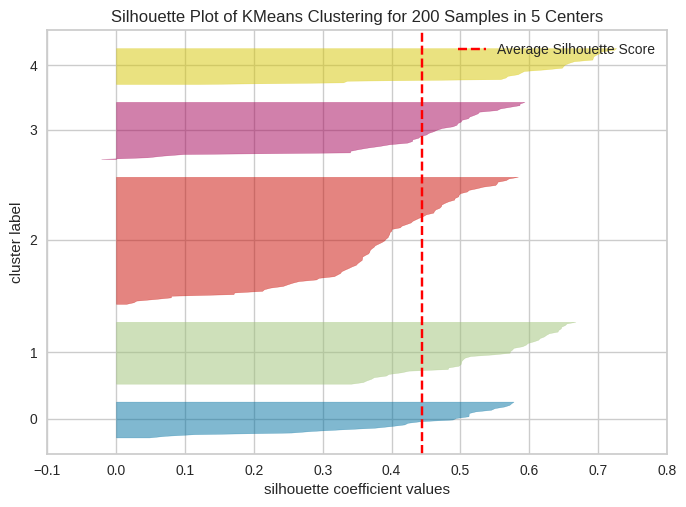

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters= 5, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors = "yellowbrick")
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

**6 CLUSTERS**

In [36]:
KM_6_clusters = KMeans(n_clusters = 6, init = "k-means++").fit(X_numerics)

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:, "Cluster"] = KM_6_clusters.labels_

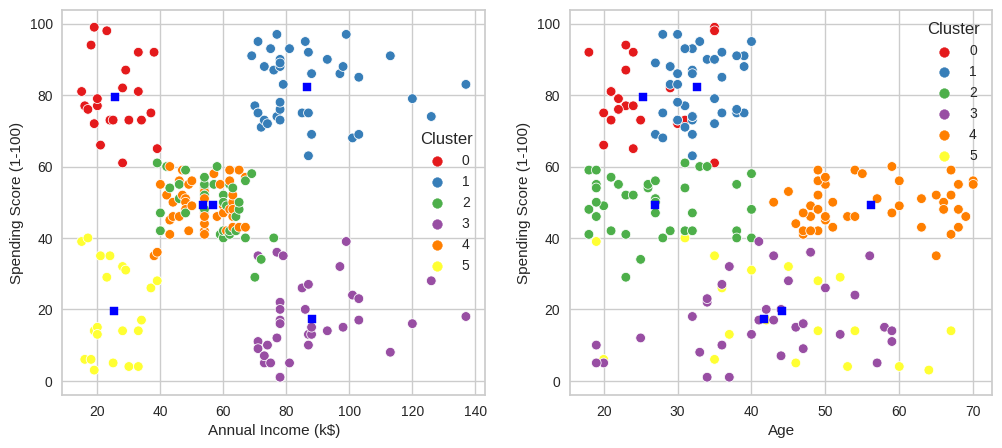

In [37]:
fig11, (axes) = plt.subplots(1, 2, figsize = (12, 5))

sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = KM6_clustered,
                hue = "Cluster", ax = axes[0], palette = "Set1", legend = "full")

sns.scatterplot(x = "Age", y = "Spending Score (1-100)", data = KM6_clustered, hue = "Cluster",
                palette = "Set1", ax = axes[1], legend = "full")

axes[0].scatter(KM_6_clusters.cluster_centers_[:, 1], KM_6_clusters.cluster_centers_[:, 2],
                marker = "s", s = 40, c = "blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:, 0], KM_6_clusters.cluster_centers_[:, 2],
                marker = "s", s = 40, c = "blue")
plt.show()

* 6개의 군집
 * 1. 연간 수입이 중간이고 소비 점수가 중간인 젊은 고객
 * 2. 연간 수입이 높고 소비 점수가 낮은 고객
 * 3. 연간 수입이 중간이고 소비 점수가 중간인 젊은 고객
 * 4. 연간 수입이 높고 소비 점수가 높은 고객
 * 5. 연간 수입이 낮고 소비 점수가 낮은 고객
 * 6. 연간 수입이 낮고 소비 점수가 높은 고객
* 고객의 나이와 관련하여 구별되는 그룹은 없음

In [38]:
KM6_clust_sizes = KM6_clustered.groupby("Cluster").size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,22
1,39
2,38
3,35
4,45
5,21


In [39]:
trace0 = tracer(KM6_clustered, 0, "Cluster 0")
trace1 = tracer(KM6_clustered, 1, "Cluster 1")
trace2 = tracer(KM6_clustered, 2, "Cluster 2")
trace3 = tracer(KM6_clustered, 3, "Cluster 3")
trace4 = tracer(KM6_clustered, 4, "Cluster 4")
trace5 = tracer(KM6_clustered, 5, "Cluster 5")

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = "Clusters by K-Means",
    scene = dict(
        xaxis = dict(title = "Age"),
        yaxis = dict(title = "Spending Score"),
        zaxis = dict(title = "Annual Income")
    )
)

fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

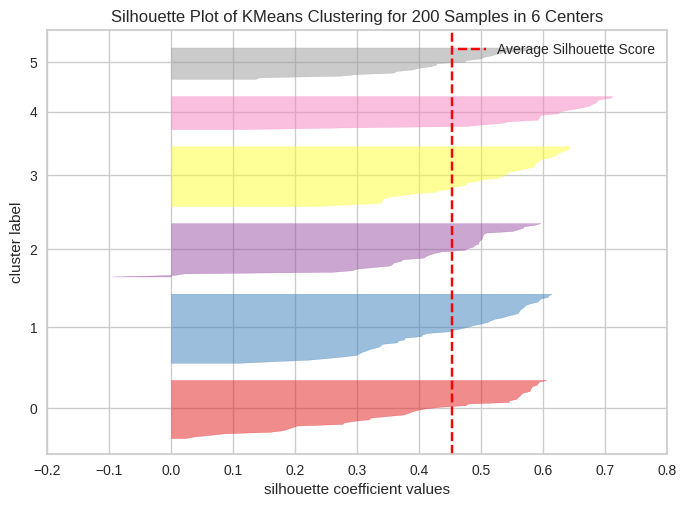

In [40]:
model = KMeans(n_clusters = 6, random_state = 0)
visualizer = SilhouetteVisualizer(model, color = "yellowbrick")
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

## 4.2 DBSCAN

### 4.2.1 Description
* Noise를 포함한 애플리케이션의 밀도 기반 공간 클러스터링을 의미
* 매개변수
 * $\epsilon$: distance
 * MinPts: Minimum number of points within distance Eps

* dense rigion은 모든 포인트 사이의 거리, $ϵ$ 내에 최소한의 포인트 수로 생성됨. 이 거리 내에 있지만 다른 포인트에 가깝지 않은 포인트들은 border point로 취급됨.

* 장점
 * $\epsilon$과 MinPts 매개변수를 기반으로 클러스터 수를 스스로 찾음
 * 클러스터가 항상 볼록한 K-평균과 달리, 타원형 클러스터나 다른 클러스터에 둘러싸인 클러스터를 구분할 수 있음
 * 어떤 클러스터에도 속하지 않는 포인트를 찾을 수 있음 (이상치 감지)

* 단점
 * 각 포인트에 대한 이웃 쿼리를 실행해야 하기 때문에 높은 계산 비용이 듦
 * 다양한 밀도의 클러스터를 잘 구분하지 못함

### 4.2.2 Use case - customers segmentation

In [41]:
from sklearn.cluster import DBSCAN

In [43]:
from itertools import product

eps_values = np.arange(8, 12.75, 0.25)
min_samples = np.arange(3, 10)

DBSCAN_params = list(product(eps_values, min_samples))

In [44]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
  DBS_clustering  = DBSCAN(eps = p[0], min_samples = p[1]).fit(X_numerics)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
  sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

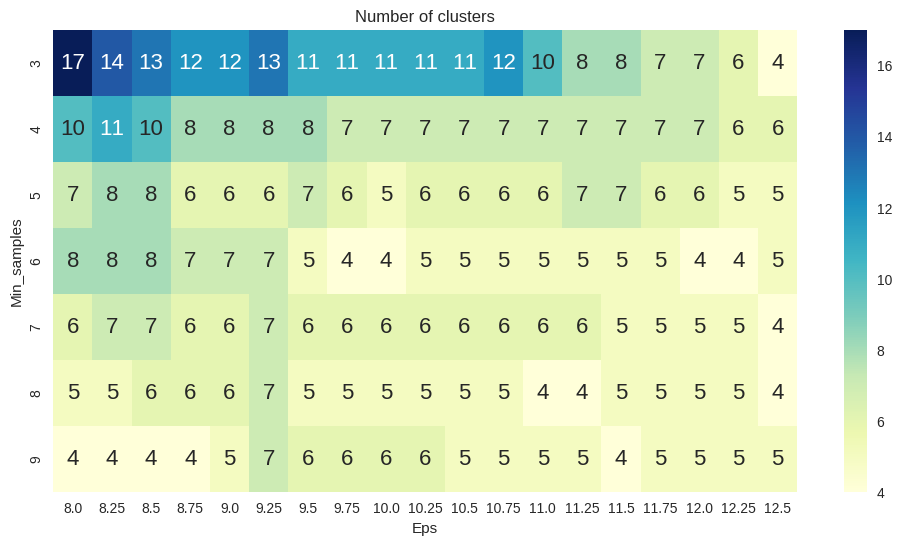

In [46]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ["Eps", "Min_samples"])
tmp["No_of_clusters"] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values = "No_of_clusters", index = "Min_samples", columns = "Eps")

fig, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {"size": 16}, cmap = "YlGnBu", ax = ax)
ax.set_title("Number of clusters")
plt.show()

* 클러스터의 수가 17개에서 4개로 다양하게 변한다는 것을 보여줌.
* 대부분의 조합은 4 ~ 7개의 클러스터를 생성.

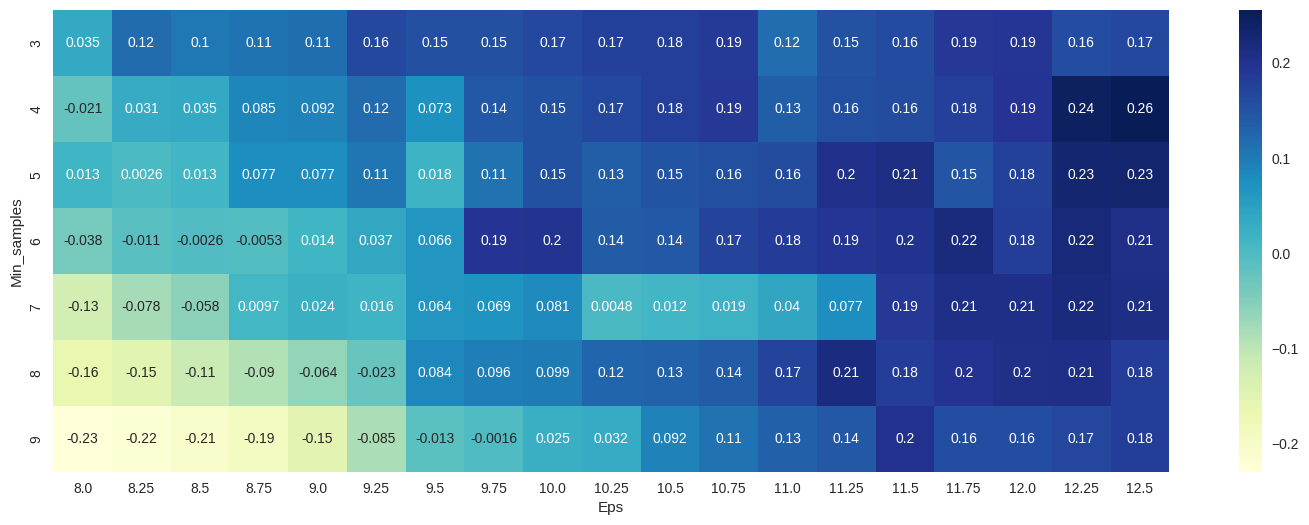

In [47]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ["Eps", "Min_samples"])
tmp["Sil_score"] = sil_score

pivot_1 = pd.pivot_table(tmp, values = "Sil_score", index = "Min_samples", columns = "Eps")

fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(pivot_1, annot = True, annot_kws = {"size": 10}, cmap = "YlGnBu", ax = ax)
plt.show()

* 전역 최대값은 eps = 12.5와 min_samples = 4일 때 0.26

In [48]:
DBS_clustering = DBSCAN(eps = 12.5, min_samples = 4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:, "Cluster"] = DBS_clustering.labels_

In [49]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby("Cluster").size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


* 5개의 클러스터와 이상치 클러스터(-1)을 생성함.
* 0 ~ 4의 클러스터 크기는 크게 다름.

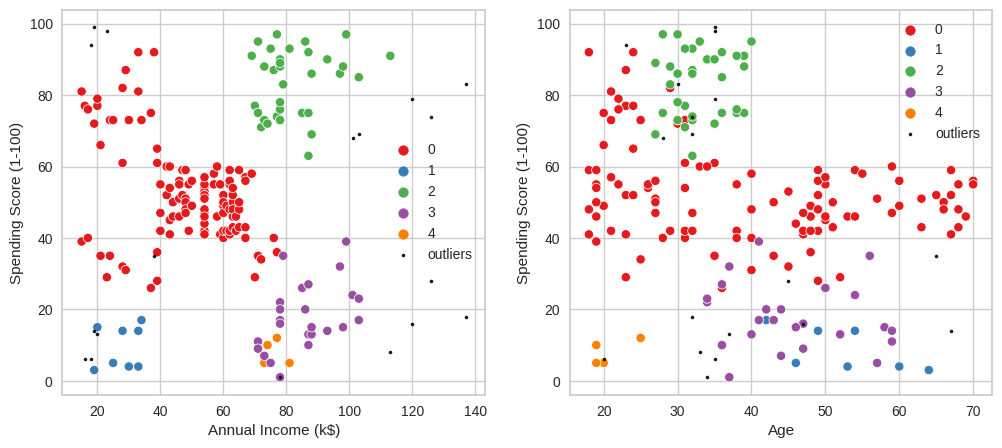

In [51]:
outliers = DBSCAN_clustered[DBSCAN_clustered["Cluster"] == -1]

fig2, (axes) = plt.subplots(1, 2, figsize = (12, 5))

sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = DBSCAN_clustered[DBSCAN_clustered["Cluster"] != -1],
                hue = "Cluster", ax = axes[0], palette = "Set1", legend = "full", s = 45)

sns.scatterplot(x = "Age", y = "Spending Score (1-100)", data = DBSCAN_clustered[DBSCAN_clustered["Cluster"] != -1],
                hue = "Cluster", palette = "Set1", ax = axes[1], legend = "full", s = 45)

axes[0].scatter(outliers["Annual Income (k$)"], outliers["Spending Score (1-100)"],
                s = 5, label = "outliers", c = "k")
axes[1].scatter(outliers["Age"], outliers["Spending Score (1-100)"],
                s = 5, label = "outliers", c = "k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize = "10")
plt.setp(axes[1].get_legend().get_texts(), fontsize = "10")

plt.show()

* 몇몇 이상치들이 존재

## 4.3 Affinity Propagation

### 4.3.1 Description
* 두 포인트 간의 메시지를 보내는 개념을 기반으로 하며, 이는 두 포인트가 서로 얼마나 유사한지 및 그들이 서로의 대표점이 될 수 있는지를 측정하는 방법
* 최적의 클러스터 수를 스스로 찾음. 그러나 매우 높은 시간 복잡도를 가짐.
* 초기화 기준에 대한 민감도가 낮다는 장점이 있음.

* 매개변수
 * Preference: 음수이며 사용되는 대표점의 수를 제어
 * Damping factor: 메시지를 업데이트할 때 숫자적 진동을 방지함

### 4.3.2 Use case - customers segmentation

In [52]:
from sklearn.cluster import AffinityPropagation

In [53]:
no_of_clusters = []
preferences = range(-20000, -5000, 100)
af_sil_score = []

for p in preferences:
  AF = AffinityPropagation(preference = p, max_iter = 200).fit(X_numerics)
  no_of_clusters.append((len(np.unique(AF.labels_))))
  af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index = ["preference", "clusters", "sil_score"]).T
af_results.sort_values(by = "sil_score", ascending = False).head()

,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


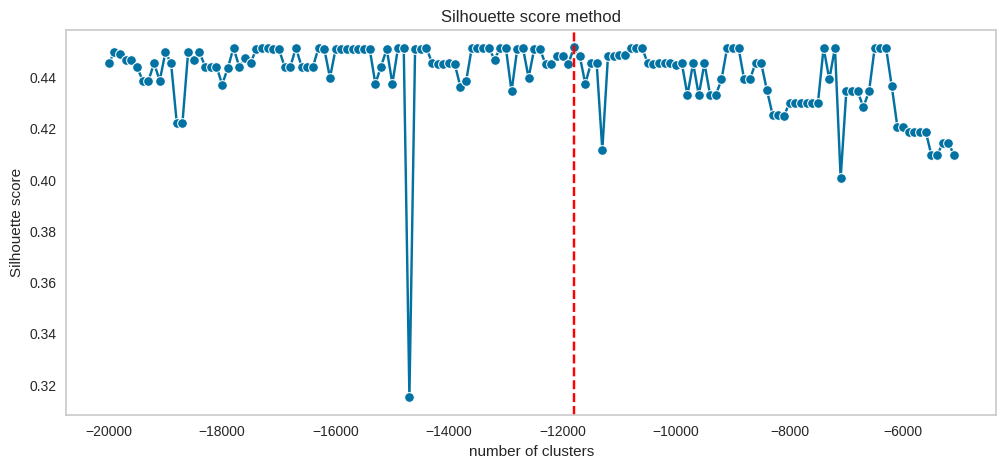

In [55]:
fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.lineplot(x = preferences, y = af_sil_score, marker = "o", ax = ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls = "--", c = "red")
plt.grid()
plt.show()

In [56]:
AF = AffinityPropagation(preference = -11800).fit(X_numerics)

In [57]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:, "Cluster"] = AF.labels_

In [58]:
AF_clust_sizes = AF_clustered.groupby("Cluster").size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


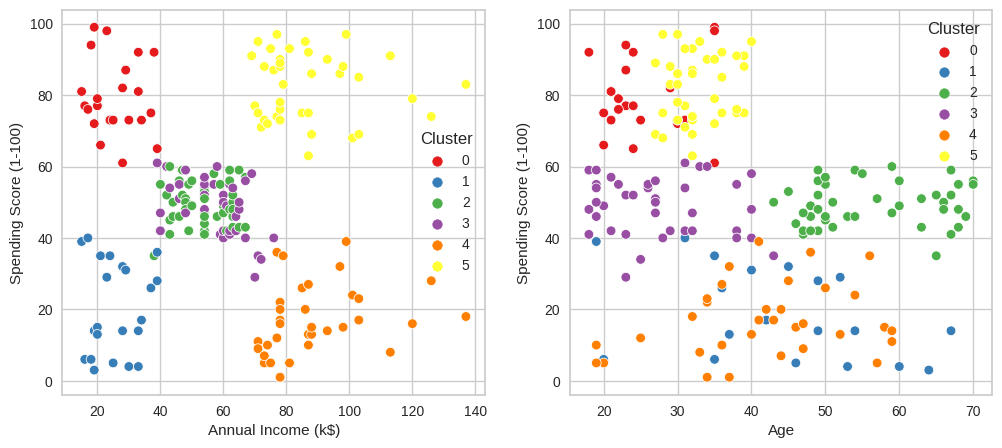

In [60]:
fig3, (ax_af) = plt.subplots(1, 2, figsize = (12, 5))

scat_1 = sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = AF_clustered,
                hue = "Cluster", ax = ax_af[0], palette = "Set1", legend = "full")

sns.scatterplot(x = "Age", y = "Spending Score (1-100)", data = AF_clustered,
                hue = "Cluster", palette = "Set1", ax = ax_af[1], legend = "full")

plt.setp(ax_af[0].get_legend().get_texts(), fontsize = "10")
plt.setp(ax_af[1].get_legend().get_texts(), fontsize = "10")
plt.show()

* k-평균에 의해 생성된 클러스터들과 유사하게 상대적으로 균일한 크기의 클러스터들을 생성함.

# 5. Comparison and discussion

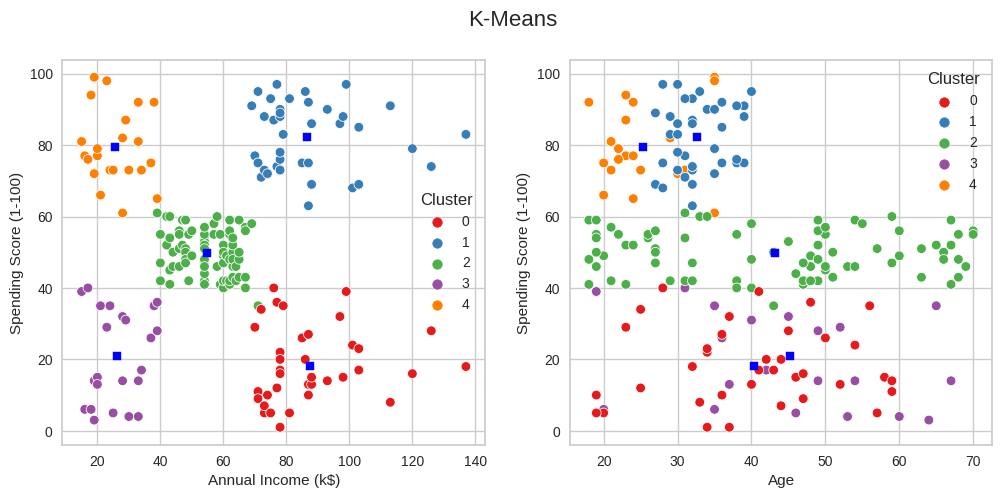

In [61]:
fig1.suptitle("K-Means", fontsize = 16)
fig1

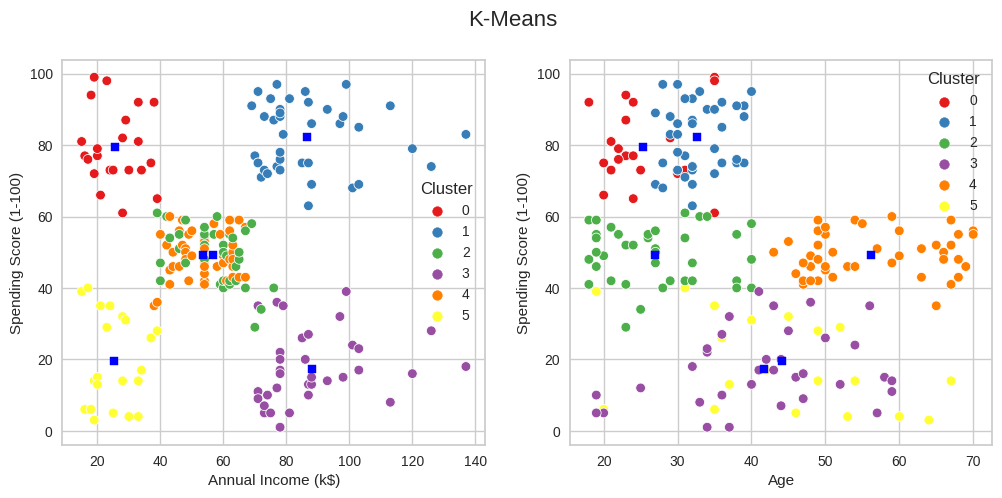

In [63]:
fig11.suptitle("K-Means", fontsize = 16)
fig11

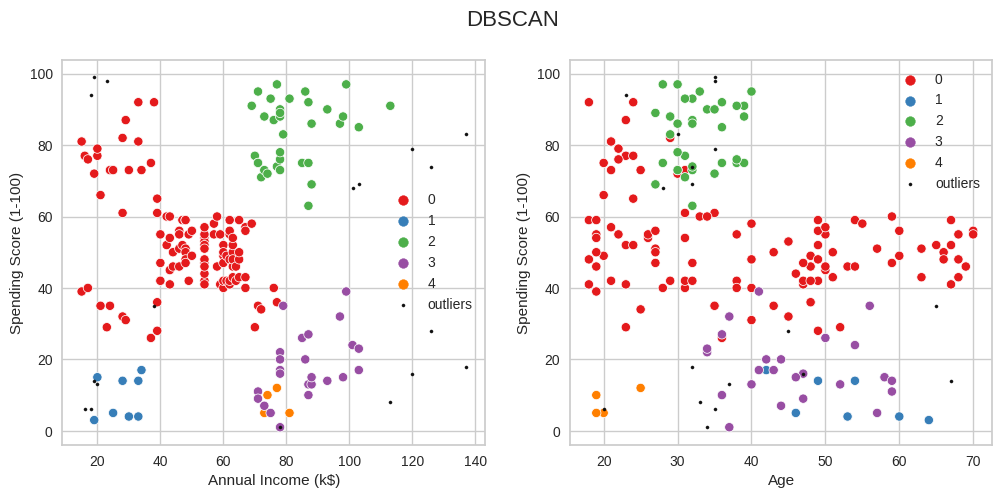

In [64]:
fig2.suptitle("DBSCAN", fontsize = 16)
fig2

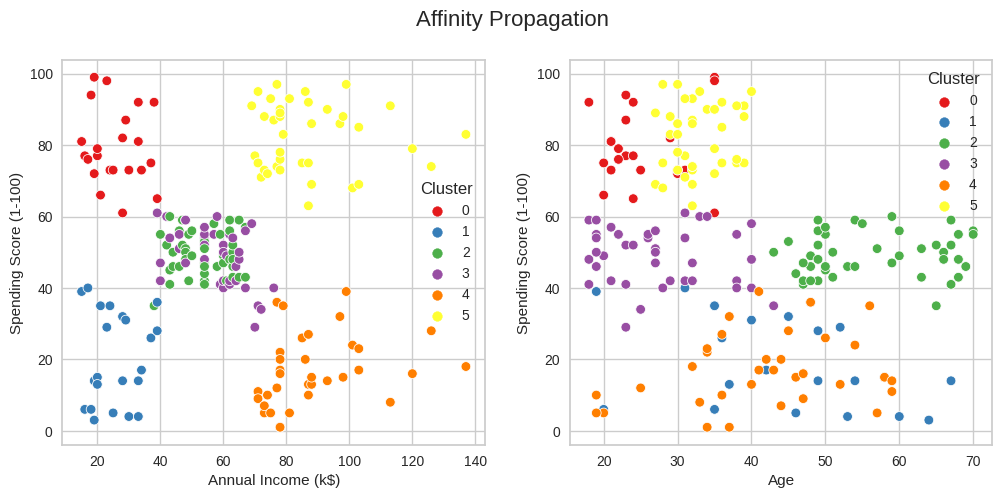

In [65]:
fig3.suptitle("Affinity Propagation", fontsize = 16)
fig3

In [66]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes], axis = 1, sort = False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,22.0,112.0,22.0
1,39.0,8.0,22.0
2,38.0,34.0,44.0
3,35.0,24.0,39.0
4,45.0,4.0,34.0
5,21.0,NaN,39.0
-1,NaN,18.0,NaN


* DBSCAN이 합리적인 클러스터를 생성하는 데 실패함
* 만약 클러스터 중 하나가 다른 클러스터보다 밀도가 낮다면, DBSAN은 가장 밀도가 낮은 그룹을 클러스터로 인식하지 않음으로써 최적이 아닌 결과를 생성함.
* K-평균과 Affinity Propagation 알고리즘이 합리적인 6개의 클러스터를 생성함.